In [6]:
import numpy as np
import pandas as pd


**ARQUIVO 1**

In [7]:
# w_data.csv

dfw = pd.read_csv('w_data.csv',
                  sep=';',
                  encoding='latin-1',
                  low_memory=False,
                  dtype='unicode',
                  usecols = ['Workclass', 'fnlwgt', 'Capital Gain', 'Capital Loss', 'Hours per week', 'ID', 'Target'])

# sep - separador de colunas
# encoding - tipo de codificação - neste caso, latin-1
# low_memory - para evitar warnings
# index_col - coluna de índice (não é necessário)
# dtype - tipo de dado de cada coluna, neste caso - unicode 
# usecols - colunas que serão utilizadas


In [8]:
# Visualizando os dados do dfw

dfw.head()


,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K


In [9]:
# Visualizando a qualidade e o tipo dos dados do dfw

dfw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       48842 non-null  object
 1   fnlwgt          48842 non-null  object
 2   Capital Gain    48842 non-null  object
 3   Capital Loss    48842 non-null  object
 4   Hours per week  48842 non-null  object
 5   ID              48843 non-null  object
 6   Target          48842 non-null  object
dtypes: object(7)
memory usage: 2.6+ MB


In [10]:
# Qual é o shape do dfw? 

dfw.shape


(48843, 7)

In [11]:
# Há valores nulos no dfw?

dfw.isnull().sum()


Workclass         1
fnlwgt            1
Capital Gain      1
Capital Loss      1
Hours per week    1
ID                0
Target            1
dtype: int64

In [12]:
# Há valores duplicados no dfw?

dfw.duplicated().sum()


0

In [13]:
# Quantos valores únicos do dfw?

dfw.nunique()


Workclass             9
fnlwgt            28523
Capital Gain        123
Capital Loss         99
Hours per week       96
ID                48843
Target                4
dtype: int64

**ARQUIVO 2**

In [15]:
dfp = pd.read_csv('p_data.csv', 
                  sep=';', 
                  encoding='latin-1', 
                  low_memory=False, 
                  dtype='unicode', 
                  usecols = ['Age', 'Sex', 'ID', 'Race', 'Country', 'Education', 'Education-Num', 'Marital Status', 'Relationship'])


# sep - separador de colunas
# encoding - tipo de codificação - neste caso, latin-1
# w_memory - para evitar warnings
# dtype - tipo de dado de cada coluna, neste caso - unicode 
# usecols - colunas que serão utilizadas


In [16]:
# Visualizando os dados do dfp

dfp.head()


,Age,Sex,ID,Race,Country,Education,Education-Num,Marital Status,Relationship
0,39,Male,49084,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,50,Male,68553,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,38,Male,143654,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,53,Male,41510,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,28,Female,195025,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [17]:
# Visualizando a qualidade e o tipo dos dados do dfw

dfp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48841 non-null  object
 1   Sex             48841 non-null  object
 2   ID              48842 non-null  object
 3   Race            48841 non-null  object
 4   Country         48841 non-null  object
 5   Education       48841 non-null  object
 6   Education-Num   48841 non-null  object
 7   Marital Status  48841 non-null  object
 8   Relationship    48841 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [18]:
# Qual é o shape do dfw? 
dfp.shape


(48842, 9)

In [19]:
# Há valores nulos no dfw?
dfp.isnull().sum()


Age               1
Sex               1
ID                0
Race              1
Country           1
Education         1
Education-Num     1
Marital Status    1
Relationship      1
dtype: int64

In [20]:
# Há valores duplicados no dfp?

dfp.duplicated().sum()


0

In [21]:
# Quantos valores únicos do dfp?

dfp.nunique()


Age                  74
Sex                   2
ID                48842
Race                  5
Country              42
Education            16
Education-Num        16
Marital Status        7
Relationship          6
dtype: int64

# COMBINAR E FUNDIR OS DFS

- Para combinar os dois dataframes, vamos utilizar o método merge
- Primeiro, vamos identificar se eles tem alguma coluna em comum que possa ser utilizada como chave

- Para identificar as colunas em comum, vamos utilizar o método columns e a função built-in set

In [22]:
coluna_comum = set(dfw.columns) & (set(dfp.columns))

coluna_comum


{'ID'}

In [23]:
# Com a coluna chave identificada, unir os dois dataframes

df_wp = pd.merge(dfw, dfp, on='ID')


In [24]:
# Vamos visualizar o df_wp

df_wp.head(5)


,Workclass,fnlwgt,Capital Gain,Capital Loss,Hours per week,ID,Target,Age,Sex,Race,Country,Education,Education-Num,Marital Status,Relationship
0,State-gov,77516.0,2174.0,0.0,40.0,49084,<=50K,39,Male,White,United-States,Bachelors,13.0,Never-married,Not-in-family
1,Self-emp-not-inc,83311.0,0.0,0.0,13.0,68553,<=50K,50,Male,White,United-States,Bachelors,13.0,Married-civ-spouse,Husband
2,Private,215646.0,0.0,0.0,40.0,143654,<=50K,38,Male,White,United-States,HS-grad,9.0,Divorced,Not-in-family
3,Private,234721.0,0.0,0.0,40.0,41510,<=50K,53,Male,Black,United-States,11th,7.0,Married-civ-spouse,Husband
4,Private,338409.0,0.0,0.0,40.0,195025,<=50K,28,Female,Black,Cuba,Bachelors,13.0,Married-civ-spouse,Wife


In [25]:
df_wp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       48841 non-null  object
 1   fnlwgt          48841 non-null  object
 2   Capital Gain    48841 non-null  object
 3   Capital Loss    48841 non-null  object
 4   Hours per week  48841 non-null  object
 5   ID              48842 non-null  object
 6   Target          48841 non-null  object
 7   Age             48841 non-null  object
 8   Sex             48841 non-null  object
 9   Race            48841 non-null  object
 10  Country         48841 non-null  object
 11  Education       48841 non-null  object
 12  Education-Num   48841 non-null  object
 13  Marital Status  48841 non-null  object
 14  Relationship    48841 non-null  object
dtypes: object(15)
memory usage: 5.6+ MB


In [26]:
# Tratanto os dados

# Vou retirar as colunas que não serão utilizadas para este estudo. Optei por tirar as colunas 1, 2, 3 e 11

df_wp.drop(df_wp.columns[[1, 2, 3, 11]], axis=1, inplace=True)


In [27]:
# Vamos visualizar o df_wp

df_wp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       48841 non-null  object
 1   Hours per week  48841 non-null  object
 2   ID              48842 non-null  object
 3   Target          48841 non-null  object
 4   Age             48841 non-null  object
 5   Sex             48841 non-null  object
 6   Race            48841 non-null  object
 7   Country         48841 non-null  object
 8   Education-Num   48841 non-null  object
 9   Marital Status  48841 non-null  object
 10  Relationship    48841 non-null  object
dtypes: object(11)
memory usage: 4.1+ MB


In [28]:
df_wp.head(5)


,Workclass,Hours per week,ID,Target,Age,Sex,Race,Country,Education-Num,Marital Status,Relationship
0,State-gov,40.0,49084,<=50K,39,Male,White,United-States,13.0,Never-married,Not-in-family
1,Self-emp-not-inc,13.0,68553,<=50K,50,Male,White,United-States,13.0,Married-civ-spouse,Husband
2,Private,40.0,143654,<=50K,38,Male,White,United-States,9.0,Divorced,Not-in-family
3,Private,40.0,41510,<=50K,53,Male,Black,United-States,7.0,Married-civ-spouse,Husband
4,Private,40.0,195025,<=50K,28,Female,Black,Cuba,13.0,Married-civ-spouse,Wife


In [29]:
# Group by - agrupando os dados com base na coluna 'Target'

df_wp.groupby('Target').size()


Target
 <=50K     24720
 <=50K.    12435
 >50K       7841
 >50K.      3845
dtype: int64

In [30]:
# Precisamos tratar a coluna 'Target" para que fiquem apenas os valores <=50K e >50K sem o ponto final

df_wp['Target'] = df_wp['Target'].str.replace('.', '')


In [31]:
# Também, vamos trocar os valores NaN pela moda da coluna

df_wp['Target'] = df_wp['Target'].fillna(df_wp['Target'].mode()[0])


In [32]:
df_wp.groupby('Target').size()


Target
 <=50K    37156
 >50K     11686
dtype: int64

Observamos que 37 mil pessoas ganham menos ou igual a 50k e pouco mais de 11 mil ganham mais de 50k



In [33]:
# vamos analisar os valores unicos do df_wp

df_wp.nunique()


Workclass             9
Hours per week       96
ID                48842
Target                2
Age                  74
Sex                   2
Race                  5
Country              42
Education-Num        16
Marital Status        7
Relationship          6
dtype: int64

In [34]:
df_wp['Race'].unique()


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other', nan], dtype=object)

In [35]:
# tirar os espaços em branco da coluna Race, Country e Education-Num, Marital Status, Relationship e workclass


In [36]:
# Race usando o strip e drop NAN

df_wp['Race'] = df_wp['Race'].str.strip()

df_wp['Country'] = df_wp['Country'].str.strip()

df_wp['Education-Num'] = df_wp['Education-Num'].str.strip()

df_wp['Marital Status'] = df_wp['Marital Status'].str.strip()

df_wp['Relationship'] = df_wp['Relationship'].str.strip()

df_wp['Workclass'] = df_wp['Workclass'].str.strip()


In [37]:
# Ainda há valores ? no df_wp?

df_wp.isin(['?']).sum() 


Workclass         2799
Hours per week       0
ID                   0
Target               0
Age                  0
Sex                  0
Race                 0
Country            857
Education-Num        0
Marital Status       0
Relationship         0
dtype: int64

In [38]:
# vamos subtituir os valores ? por NaN

df_wp = df_wp.replace('?', np.nan)

# Vamos visualizar o df_wp

df_wp.isin(['?']).sum()


Workclass         0
Hours per week    0
ID                0
Target            0
Age               0
Sex               0
Race              0
Country           0
Education-Num     0
Marital Status    0
Relationship      0
dtype: int64

In [39]:
# Há valores nulos no df_wp?

df_wp.isnull().sum()


Workclass         2800
Hours per week       1
ID                   0
Target               0
Age                  1
Sex                  1
Race                 1
Country            858
Education-Num        1
Marital Status       1
Relationship         1
dtype: int64

In [40]:
# Precisamos tratar os valores NAN e substituir pela moda da coluna Workclass e Country. 

df_wp['Workclass'] = df_wp['Workclass'].fillna(df_wp['Workclass'].mode()[0])

df_wp['Country'] = df_wp['Country'].fillna(df_wp['Country'].mode()[0])


# Vamos visualizar o df_wp

df_wp.isnull().sum()


Workclass         0
Hours per week    1
ID                0
Target            0
Age               1
Sex               1
Race              1
Country           0
Education-Num     1
Marital Status    1
Relationship      1
dtype: int64

In [41]:
# as demais colunas tem apenas 1 valor nulo, mas vamos substituir pela moda da coluna

df_wp['Education-Num'] = df_wp['Education-Num'].fillna(df_wp['Education-Num'].mode()[0])

df_wp['Hours per week'] = df_wp['Hours per week'].fillna(df_wp['Hours per week'].mode()[0])

df_wp['Marital Status'] = df_wp['Marital Status'].fillna(df_wp['Marital Status'].mode()[0])

df_wp['Relationship'] = df_wp['Relationship'].fillna(df_wp['Relationship'].mode()[0])

df_wp['Age'] = df_wp['Age'].fillna(df_wp['Age'].mode()[0])

df_wp['Sex'] = df_wp['Sex'].fillna(df_wp['Sex'].mode()[0])

df_wp['Race'] = df_wp['Race'].fillna(df_wp['Race'].mode()[0])


# Vamos visualizar o df_wp

df_wp.isnull().sum()


Workclass         0
Hours per week    0
ID                0
Target            0
Age               0
Sex               0
Race              0
Country           0
Education-Num     0
Marital Status    0
Relationship      0
dtype: int64

In [42]:
df_wp['Relationship'].unique()


array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [43]:
df_wp['Marital Status'].unique()


array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [44]:
df_wp['Workclass'].unique()


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [45]:
df_wp['Education-Num'].unique()


array(['13.0', '9.0', '7.0', '14.0', '5.0', '10.0', '12.0', '11.0', '4.0',
       '16.0', '15.0', '3.0', '6.0', '2.0', '1.0', '8.0'], dtype=object)

In [46]:
# Quais colunas precisamos transformar em numéricas?

df_wp.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       48842 non-null  object
 1   Hours per week  48842 non-null  object
 2   ID              48842 non-null  object
 3   Target          48842 non-null  object
 4   Age             48842 non-null  object
 5   Sex             48842 non-null  object
 6   Race            48842 non-null  object
 7   Country         48842 non-null  object
 8   Education-Num   48842 non-null  object
 9   Marital Status  48842 non-null  object
 10  Relationship    48842 non-null  object
dtypes: object(11)
memory usage: 4.1+ MB


In [47]:
# Vamos transformar as colunas 'Age', 'Education-Num', 'Hours per week' em numéricas

df_wp['Age'] = pd.to_numeric(df_wp['Age'])

df_wp['Education-Num'] = pd.to_numeric(df_wp['Education-Num'])

df_wp['Hours per week'] = pd.to_numeric(df_wp['Hours per week'])

# Vamos visualizar o df_wp

df_wp.info()    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Workclass       48842 non-null  object 
 1   Hours per week  48842 non-null  float64
 2   ID              48842 non-null  object 
 3   Target          48842 non-null  object 
 4   Age             48842 non-null  int64  
 5   Sex             48842 non-null  object 
 6   Race            48842 non-null  object 
 7   Country         48842 non-null  object 
 8   Education-Num   48842 non-null  float64
 9   Marital Status  48842 non-null  object 
 10  Relationship    48842 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 4.1+ MB


# REALIZANDO ALGUNS CALCULOS

In [48]:
# Calcular a proporção entre pessoas com salários >50k em relação ao total com pessoas que 
# difiram em sexo

df_wp['Sex'].unique()


array([' Male', ' Female'], dtype=object)

In [84]:
# Vamos calcular a proporção de pessoas que ganham >50k em relação ao total de mulheres -utilizando a coluna 'Sex' como filtro

# considerando as colunas SEX e TARGET , quantas mulheres ganham mais de 50k?

df_wp['Sex'] = df_wp['Sex'].str.replace(' ','')
df_wp['Target'] = df_wp['Target'].str.replace(' ','')
df_woman = df_wp[df_wp['Sex'] == 'Female'] # primeiro vamos filtrar as mulheres
df_above_50k = df_woman[df_woman['Target'] == '>50K'] # agora vamos filtrar as mulheres que ganham mais de 50k
# proporção de'Female' que ganham mais de 50k

proportion = len(df_above_50k.index) / len(df_woman.index) * 100
print(round(proportion,2),'%')


10.93 %


In [85]:
# ACUSOU ERRO PORQUE EU NÃO CONSIDEREI A DIVISÃO POR ZERO.

# VOU REPETIR A OPERAÇÃO E APLICAR A MESMA LÓGICA PARA OS 'Male'

# vou usar .srt.strip() para retirar os espaços em branco antes e depois dos valores da coluna
df_wp['Sex'] = df_wp['Sex'].str.strip()
df_wp['Target'] = df_wp['Target'].str.strip()

total_men_df_wp = df_wp[df_wp['Sex'].str.lower() == 'male']
total_women_df_wp = df_wp[df_wp['Sex'].str.lower() == 'female']

earning_men_df_wp = total_men_df_wp[total_men_df_wp['Target'].str.lower() == '>50k']
earning_women_df_wp = total_women_df_wp[total_women_df_wp['Target'].str.lower() == '>50k']

proportion_men = len(earning_men_df_wp.index) / len(total_men_df_wp.index) * 100
proportion_women = len(earning_women_df_wp.index) / len(total_women_df_wp.index) * 100

print(round(proportion_men,2),'%',' ',round(proportion_women,2),'%')
proportion_men, proportion_women


30.37 %   10.93 %


(30.373660030627867, 10.925148221343873)

- Para facilitar o entendimento do leitor, utilizarei um grafico de barras simples. 

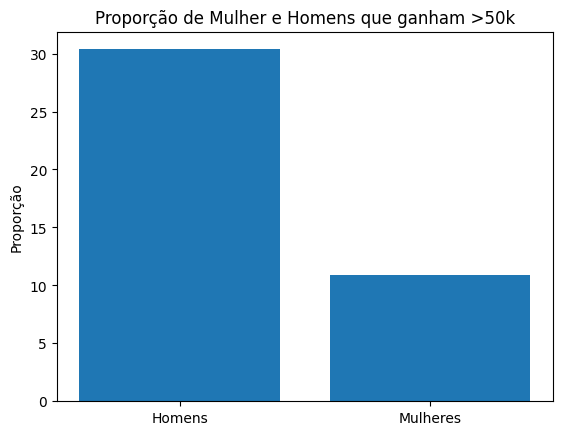

In [86]:
import matplotlib.pyplot as plt

# Vou precisar criar uma lista com as proporções de homens e mulheres 
proportions = [proportion_men, proportion_women]
labels = ['Homens', 'Mulheres'] 

plt.bar(labels, proportions)
plt.ylabel('Proporção')
plt.title('Proporção de Mulher e Homens que ganham >50k')

plt.show()


- Neste caso, verificamos que a proporção de homens que ganham mais de 50k é maior que a proporção de mulheres

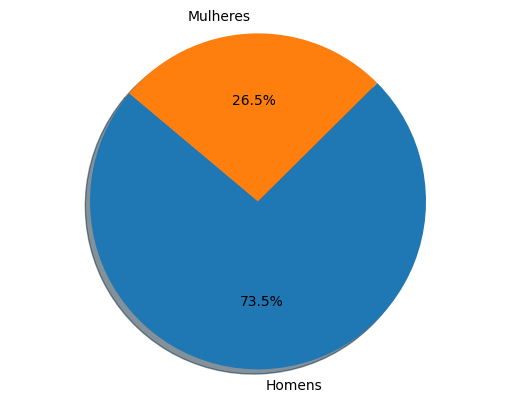

In [87]:
# Para mostrar o percentual de homens e mulheres que ganham >50k, vou usar o pie chart
# vamos usar os valores encontrados em proportion_men, proportion_women


plt.pie(proportions, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
# proportion é a lista com as proporções de homens e mulheres 

plt.axis('equal') # axis igual para que o gráfico fique redondo

plt.show()
